<a href="https://colab.research.google.com/github/sarahajbane/notebooks/blob/main/car_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Dataset Analysis
Author: Sara Hajbane


# Data Cleaning

## Import Libraries and Data

In [ ]:
# Import required libraries and functions
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import chi2_contingency
from scipy import stats

In [ ]:
# Access car data required
data = !wget -O 'data.csv' 'https://drive.google.com/uc?id=19V7VjHs4J8idTko7NQUT95ZJO2ZQSGWh'
df = pd.read_csv("/content/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Handle Missing Data

In [ ]:
# Identify nulls, check data types
df.info() ## - Note: Year is a integer ✓

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df_cleaned = df.copy() # create a copy to hold cleaned dataframe
df_cleaned.shape

(11914, 16)

In [ ]:
# show counts of nulls and duplicates
for i in df_cleaned.isnull().sum():
  if i>0:
    print(i)

print('Duplicates:', df_cleaned.duplicated().sum())

3
69
30
6
3742
Duplicates: 715


In [ ]:
df_cleaned.drop_duplicates(inplace=True) # drop duplicates in the new dataframe
print(f'Remaining duplicates: {df_cleaned.duplicated().sum()}') # check duplicates

Remaining duplicates: 0


## Data Type Conversions

In [ ]:
# Confirm Year is numerical again
df_cleaned['Year'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Year
Non-Null Count  Dtype
--------------  -----
11199 non-null  int64
dtypes: int64(1)
memory usage: 175.0 KB


In [ ]:
# Get the most frequent category values to to fill NaNs with low missing values
df_cleaned.fillna({'Engine Fuel Type': df['Engine Fuel Type'].mode()[0]},inplace=True)
df_cleaned.fillna({'Engine HP': df['Engine HP'].mode()[0]},inplace=True)
df_cleaned.fillna({'Engine Cylinders': df['Engine Cylinders'].mode()[0]},inplace=True)
df_cleaned.fillna({'Number of Doors': df['Number of Doors'].mode()[0]},inplace=True)
print(f'Remaining null values:\n{df_cleaned.isnull().sum()}')

Remaining null values:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [ ]:
# Converting floats without decimals to integers
#df_cleaned['Engine Cylinders'].unique()
df_cleaned['Engine Cylinders'] = df_cleaned['Engine Cylinders'].astype('int')

#df_cleaned['Engine HP'].unique()
df_cleaned['Engine HP'] = df_cleaned['Engine HP'].astype('int')

#df_cleaned['Number of Doors'].unique()
df_cleaned['Number of Doors'] = df_cleaned['Number of Doors'].astype('int')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11199 non-null  object
 1   Model              11199 non-null  object
 2   Year               11199 non-null  int64 
 3   Engine Fuel Type   11199 non-null  object
 4   Engine HP          11199 non-null  int64 
 5   Engine Cylinders   11199 non-null  int64 
 6   Transmission Type  11199 non-null  object
 7   Driven_Wheels      11199 non-null  object
 8   Number of Doors    11199 non-null  int64 
 9   Market Category    7823 non-null   object
 10  Vehicle Size       11199 non-null  object
 11  Vehicle Style      11199 non-null  object
 12  highway MPG        11199 non-null  int64 
 13  city mpg           11199 non-null  int64 
 14  Popularity         11199 non-null  int64 
 15  MSRP               11199 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.5+ MB


In [ ]:
df_cleaned['Market Category'].head() # mixed / compound categories

,Market Category
0,"Factory Tuner,Luxury,High-Performance"
1,"Luxury,Performance"
2,"Luxury,High-Performance"
3,"Luxury,Performance"
4,Luxury


In [ ]:
df_cleaned['Market Category'].describe() # 72 unique categories, top not far over 10% of variabilty (1k of 8k)

,Market Category
count,10603
unique,72
top,unspecified
freq,1683


In [ ]:
#Check Market Category correlation with chi value to decide how to handle null values in Market Sector

def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2))
    stats = chi2_contingency(crosstab)[0]
    cram_V = stats / (np.sum(crosstab) * (min(crosstab.shape) - 1))
    return cram_V

def cramers_col(column_name):
    col = pd.Series(np.empty(df_cleaned.columns.shape), index=df_cleaned.columns, name=column_name)
    for row in df_cleaned:
        cram = cramers_V(df_cleaned[column_name], df_cleaned[row])
        col[row] = round(cram, 2)
    return col

df_corr = df_cleaned.apply(lambda Market_Category : cramers_col('Market Category'))
df_corr.Make # call any column (they all the same)
# highest chi = highest correlation for MSRP -  Manufacturer's Suggested Retail Price

,Make
Make,0.13
Model,0.50
Year,0.03
Engine Fuel Type,0.40
Engine HP,0.28
Engine Cylinders,0.15
Transmission Type,0.14
Driven Wheels,0.21
Number of Doors,0.17
Market Category,1.00


<Axes: >

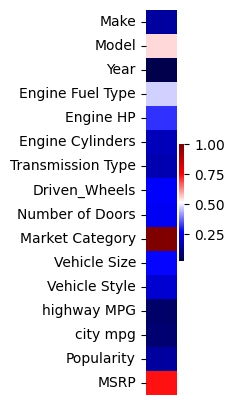

In [ ]:
#optional basic viz
plt.figure(figsize=(.5, 5))
sns.heatmap(df_corr, cmap = 'seismic', xticklabels = False)

In [ ]:
# Replace Market Category NaNs with Retail Price grouping
#df_cleaned[df_cleaned['Market Category'].isnull()].describe()
df_cleaned['Market Category'] = df_cleaned.groupby('MSRP')['Market Category'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unspecified'))

In [ ]:
(df_cleaned['Market Category'] == 'Unspecified').sum() # improvement from 3376 NaNs to 1703 unspecified

1702

## Filter Data

In [ ]:
new_df = df_cleaned[df_cleaned['Year'] >= 1995]
new_df.shape

(10603, 16)

## String Operations

In [ ]:
# STRING OPERATION Clean up column headers to match rest of headers
df_cleaned.rename(columns={'Driven_Wheels':'Driven Wheels','highway MPG':'Highway MPG',
                           'city mpg': 'City MPG'}, inplace=True)


In [ ]:
# STRING OPERATION Converting fields to lower case (add Transmission Type & Vehicle Size to match rest of data)
df_cleaned['Market Category'] = df_cleaned['Market Category'].str.lower()
df_cleaned["Vehicle Style"] = df_cleaned["Vehicle Style"].str.lower()
df_cleaned["Vehicle Size"] = df_cleaned["Vehicle Size"].str.lower()
df_cleaned['Transmission Type'] = df_cleaned['Transmission Type'].str.lower()
df_cleaned.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,manual,rear wheel drive,2,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,performance",compact,convertible,28,19,3916,40650


# Feature Engineering

### Create New Columns

In [ ]:
# Create new column with the average between City & Highway Miles per Gallon
df_cleaned['Total MPG'] = df_cleaned[['City MPG', 'Highway MPG']].mean(axis=1)
# Calculate and add a column for the retail price per engine horse power
df_cleaned['Price per HP'] = round(df_cleaned['MSRP'] / df_cleaned['Engine HP'].replace(0,1),0).astype('int')
df_cleaned.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP,Total MPG,Price per HP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,manual,rear wheel drive,2,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,22.5,138
1,BMW,1 Series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,performance",compact,convertible,28,19,3916,40650,23.5,136
2,BMW,1 Series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,high-performance",compact,coupe,28,20,3916,36350,24.0,121
3,BMW,1 Series,2011,premium unleaded (required),230,6,manual,rear wheel drive,2,"luxury,performance",compact,coupe,28,18,3916,29450,23.0,128
4,BMW,1 Series,2011,premium unleaded (required),230,6,manual,rear wheel drive,2,luxury,compact,convertible,28,18,3916,34500,23.0,150


## Save Cleaned Data for Download / Reload

In [ ]:
# save cleaned file in colab runtime disk
df_cleaned.to_csv('cleaned_data_Sara_Hajbane.csv', index=False)

In [ ]:
# Download the cleaned dataset locally (uncomment below if required)
# files.download('cleaned_data_Sara_Hajbane.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#reload cleaned data (uncomment below and adjust filepath as required)
#df_cleaned = pd.read_csv("/content/cleaned_data_Sara_Hajbane.csv")

# Exploratory Data Analysis

##Summary Statistics

In [ ]:
# Summary stats for Engine HP, MSRP, Popularity, Highway MPG, and City MPG
df_cleaned[['Engine HP', 'MSRP', 'Popularity', 'Highway MPG', 'City MPG']].describe()
#alt:
#df_cleaned[['Engine HP', 'MSRP', 'Popularity', 'Highway MPG', 'City MPG']].mean()
#df_cleaned[['Engine HP', 'MSRP', 'Popularity', 'Highway MPG', 'City MPG']].median() # same as 50%-ile above
#df_cleaned[['Engine HP', 'MSRP', 'Popularity', 'Highway MPG', 'City MPG']].std()

,Engine HP,MSRP,Popularity,Highway MPG,City MPG
count,10603.000000,1.060300e+04,10603.00000,10603.000000,10603.000000
mean,258.745261,4.415901e+04,1575.32736,26.746298,19.831840
std,109.367974,6.249507e+04,1459.06585,9.120727,9.371049
min,55.000000,2.000000e+03,2.00000,12.000000,7.000000
25%,180.000000,2.312000e+04,549.00000,22.000000,16.000000
50%,240.000000,3.163000e+04,1385.00000,26.000000,18.000000
75%,305.000000,4.400000e+04,2009.00000,30.000000,22.000000
max,1001.000000,2.065902e+06,5657.00000,354.000000,137.000000


## Group Analysis

Calculate the average MSRP and Popularity for cars grouped by: Driven Wheels, Vehicle Size, and Engine Cylinders

In [ ]:
avg_mprs_pop = df_cleaned.groupby(['Driven Wheels', 'Vehicle Size', 'Engine Cylinders'])[['MSRP', 'Popularity']].mean().astype('int').reset_index()
avg_mprs_pop.head()

,Driven Wheels,Vehicle Size,Engine Cylinders,MSRP,Popularity
0,all wheel drive,compact,4,30687,1276
1,all wheel drive,compact,5,41291,1615
2,all wheel drive,compact,6,72580,1442
3,all wheel drive,compact,8,99476,3497
4,all wheel drive,compact,10,205888,2052


## Visualizations

### City Miles per Gallon

<Axes: xlabel='City MPG', ylabel='Percent'>

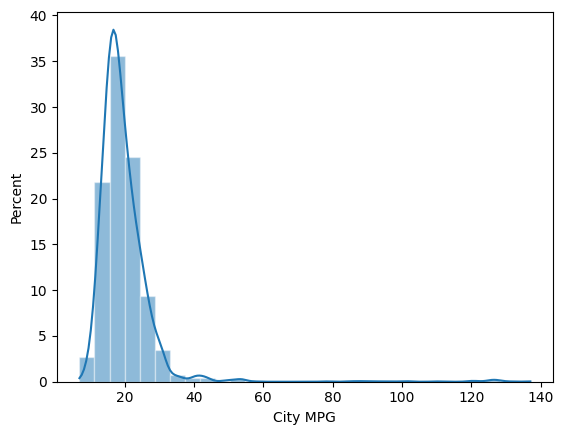

In [ ]:
# Distribution of miles per gallon in the city (City mpg)

sns.histplot(df_cleaned['City MPG'], bins=30, stat='percent', kde = True,
             alpha=.5, edgecolor=(1, 1, 1, .4))

**Key Insight**: This histogram shows the distribution of fuel economy of cars as miles per gallon in the city (City MPG). It shows that approximately 40% of cars have a range of between 16-20 miles per gallon. The distribution however is extremely right skewed, showing some cars that cover up to nearly 140 miles with a single gallon of fuel. This most likely a result of the inclusion of hybrid cars in the city using predominantly electic charge, but still have > 0 fuel consumption listed. Normalising the distribution would require further analysis beyond the scope of this EDA deliverable.

### Average Manufacturer's Suggested Retail Price by Vehicle Size

Text(0, 0.5, 'Mean Suggested Retail Price')

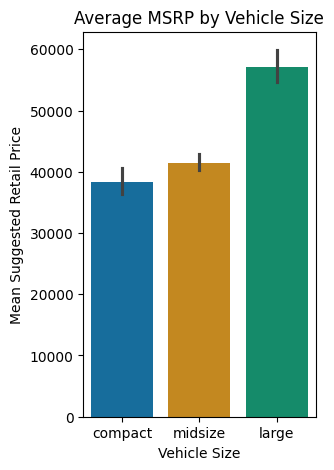

In [ ]:
#bar plot
avg_msrp = df_cleaned.groupby('Vehicle Size')['MSRP'].mean().reset_index()
plt.figure(figsize=(3, 5))
sns.barplot(x='Vehicle Size', y='MSRP', data=df_cleaned, hue = 'Vehicle Size', palette = 'colorblind')
plt.title('Average MSRP by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Mean Suggested Retail Price')

**Key Insight**: This bar graph shows the mean MSRP for cars based on the 3 vehicle size included ('compact','midsize', and 'large'). There is no significant difference in MSRP between compact and midsize vehicles, as is evident in the overlapping error bars along the MSRP axis ranging around 40k, but large vehicles are priced significantly higher on average ranging roughly between 54 - 60k.

### Relationship between Engine Horsepower & Manufacturer's Suggested Retail Price

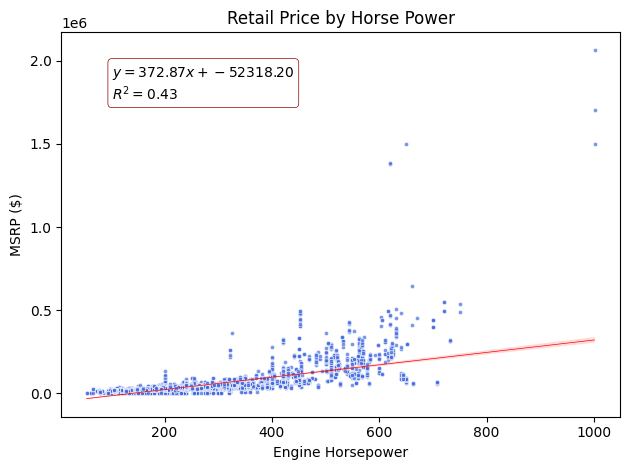

In [ ]:
# Plot the relationship with added linear regression
x = df_cleaned['Engine HP']
y = df_cleaned['MSRP']
slope, intercept, r_value, p_value, std_err = stats.linregress(df_cleaned['Engine HP'], df_cleaned['MSRP'])

sns.scatterplot(data=df_cleaned, x='Engine HP', y='MSRP', alpha=0.7, marker ='.', color = 'royalblue')
plt.title('Retail Price by Horse Power')
sns.regplot(x='Engine HP', y='MSRP', data=df_cleaned, scatter=False,
            line_kws=dict(color='red', linewidth=.5),
            scatter_kws=dict(alpha=0.5), ci=80)

plt.annotate(f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_value**2:.2f}$",
             xy=(x.min() + (x.max() - x.min()) * 0.05, y.max() - (y.max() - y.min()) * 0.1),
            horizontalalignment= 'left',
            verticalalignment= 'center',
            bbox=dict(boxstyle="round", fc="white", ec="darkred", lw=.5))

plt.xlabel('Engine Horsepower')  # Added x-axis label
plt.ylabel('MSRP ($)')  # Added y-axis label

plt.tight_layout()  # Adjust layout to prevent clipping
#plt.show()

**Key Insight**: This scatterplot shows the relationship between engine horsepower and MSRP. The scatter alone suggests an exponential increase in MSRP with increasing horsepower. However, this exponential increase appears most pronounced for values above the previously identified higher average bound of approx 60k. An added linear regression shows a relatively low R^2 of 0.43, but little error in the CI for a linear trend. In the next steps the clear outliers in terms of high MSRP are removed, to understand better whether the trend of increasing MSRP with higher HP is linear or exponential.

In [ ]:
# Identify extreme outliers above 1 million MSRP
y.max()
y_outliers = df_cleaned['MSRP'][df_cleaned['MSRP'] >= 1000000]
y_outliers # 6 outliers identified

,MSRP
6350,1380000
6351,1382750
8486,1500000
11362,2065902
11363,1500000
11364,1705769


In [ ]:
# reassign x & y, with the latter having extreme outliers removed
# where MSRP is less than 1,000,000
df_filtered = df_cleaned[df_cleaned['MSRP'] < 1000000]
x = df_filtered['Engine HP']
y = df_filtered['MSRP']
y.describe()

,MSRP
count,10597.000000
mean,43284.280457
std,50231.420256
min,2000.000000
25%,23120.000000
50%,31625.000000
75%,43995.000000
max,643330.000000


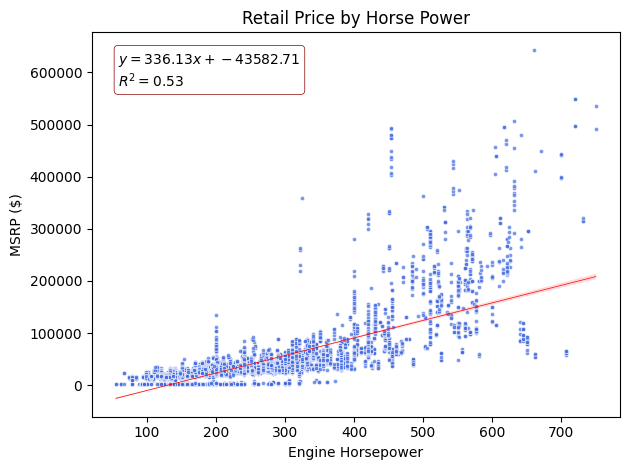

In [ ]:
#Replot linear regression without extreme outliers above $1 million MSRP
slope, intercept, r_value, p_value, std_err = stats.linregress(df_filtered['Engine HP'], df_filtered['MSRP'])
sns.scatterplot(data=df_filtered, x='Engine HP', y='MSRP', alpha=0.7, marker ='.', color = 'royalblue')
plt.title('Retail Price by Horse Power - Linear Regression')
sns.regplot(x='Engine HP', y='MSRP', data=df_filtered, scatter=False,
            line_kws=dict(color='red', linewidth=.5),
            scatter_kws=dict(alpha=0.5), ci=80)


plt.annotate(f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_value**2:.2f}$",
            xy=(0.05, 0.95), xycoords='axes fraction',
            horizontalalignment= 'left',
            verticalalignment= 'top',
            bbox=dict(boxstyle="round", fc="white", ec="darkred", lw=.5))

plt.xlabel('Engine Horsepower')
plt.ylabel('MSRP ($)')
# R value improved by .1!

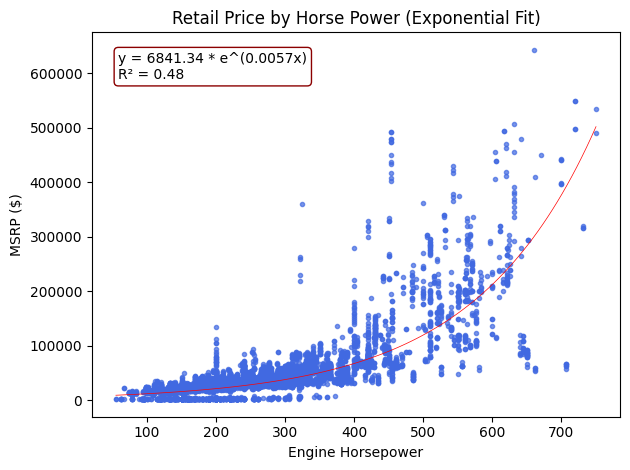

In [ ]:
# Fit exponential regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_filtered['Engine HP'], np.log(df_filtered['MSRP']))

plt.scatter(x, y, alpha=0.7, marker='.', color='royalblue')
plt.title('Retail Price by Horse Power (Exponential Fit)')
plt.xlabel('Engine Horsepower')
plt.ylabel('MSRP ($)')
x_exp = np.linspace(x.min(), x.max(), 100)
y_exp = np.exp(intercept) * np.exp(slope * x_exp)
plt.plot(x_exp, y_exp, color='red', linewidth=1)

plt.annotate(f"y = {np.exp(intercept):.2f} * e^({slope:.4f}x)\nR² = {r_value**2:.2f}",
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round", fc="white", ec="darkred", lw=0.5),
             horizontalalignment='left', verticalalignment='top')
plt.tight_layout()
# while it looks better visually, R^2 has decreased again - linear trend fits the data better

**Conclusion**: Despite the better visual fit of a log curve, the R values show that the increase in MSRP with increased horsepower approaches a linear trend more closely, but falls relatively short of meeting a high confidence level. This is not surprising as the car dataset is very diverse, and in particular many electric vehicles don't have high 'engine horsepower', but still come at a high price.

### Distribution of MSRP by Driven Wheels

(0.0, 130000.0)

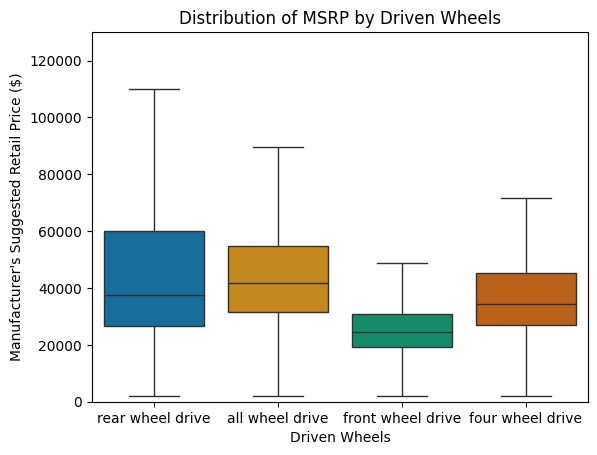

In [ ]:
# Boxplot of MSRP by Drivel Wheels - extreme outliers still removed and all outliers not plotted
# to include outliers in plot remove 'fliersize= 0' from boxplot
data = df_filtered
sns.boxplot(x='Driven Wheels', y='MSRP', data=df_cleaned, fliersize= 0, hue = 'Driven Wheels', palette = 'colorblind') #outliers removed
plt.title('Distribution of MSRP by Driven Wheels')
plt.xlabel('Driven Wheels')
plt.ylabel("Manufacturer's Suggested Retail Price ($)")
plt.ylim(0,130000)

**Key Insight**: This box plot shows the distribution of retail prices for cars according to their type of drive (Driven Wheels). There is no clear, statistically significant difference in the retail price distributions, but the front-wheel drive type stands out as having the lowest interquartile range and the lowest MSRP. While all categories have almost identical minimum values, rear-wheel drive has the widest distribution with the highest upper quartile and maximum retail prices, while all-wheel drives have a slighty higher average retail prices.

###  Trends in average City MPG and Highway MPG by Transmission Type

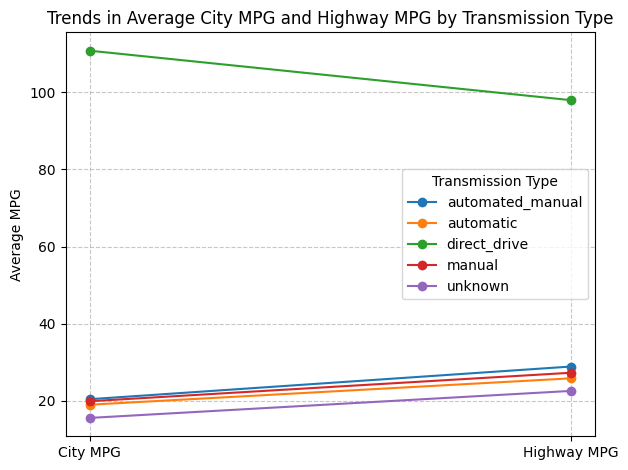

In [ ]:
# Line chart to show the trends in average miles per gallon by transmission type between city and highway driving
avg_mpg_by_transmission = df_cleaned.groupby('Transmission Type')[['City MPG', 'Highway MPG']].mean()
avg_mpg_by_transmission.T.plot(kind='line', marker='o') # call .T method to transpose
plt.title('Trends in Average City MPG and Highway MPG by Transmission Type')
plt.ylabel('Average MPG')
plt.xticks([0, 1], ['City MPG', 'Highway MPG'])
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title='Transmission Type')
plt.tight_layout()

**Key Insight**: Looking at a line graph of the trends in average city/highway MPG between different transmission types, there is a clear outlier. While all other transmission types show a slight increase in MPG efficiency (in the range of 15 - 25 mpg), direct drive transmission types show a much higher fuel efficiency in the city of around 110, which drops to just under 100 on the highway. As diesel and petrol engines are not well suited to direct drive transmissions, this trend is consistent with the hypothesis that electric/hybrid cars have created the heavily right-skewed distribution in city MPG previously identified. The lower fuel efficiency on the motorway, in contrast to other transmission types, makes sense as electric vehicles are more likely to run out of charge and have to switch to conventional fuels on longer journeys.

# Correlation Analysis



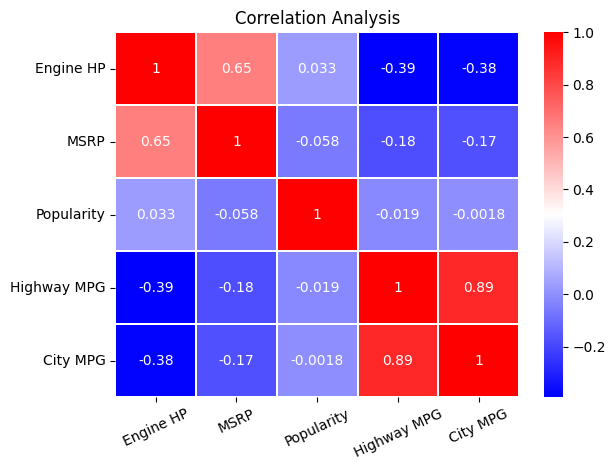

In [ ]:
corr = df_cleaned[['Engine HP','MSRP','Popularity','Highway MPG','City MPG']].corr()
sns.heatmap(corr, cmap='bwr', annot=True, linewidths=.01)
plt.xticks (rotation=25)
plt.title('Correlation Analysis')
plt.tight_layout()

**Key Insight**:
The heatmap shows strong positive correlations between city and highway MPG efficiency and between engine horsepower and MSRP, but to a lesser extent. This shows that in the age of electric vehicles, higher horsepower does not necessarily correlate with higher retail prices. Engine HP shows a strong negative correlation with both City & Hwy MPG, showing that more horsepower is generally associated with lower fuel efficiency. Popularity is not very strongly correlated with any of the variables included, but shows that lower retail prices have the highest correlation with a car's popularity.

# Summary of Findings

The exploratory data analysis (EDA) of the car dataset revealed several key insights and patterns. As a first step, data cleaning involved imputing NaN values based on mode for most categories, with special attention given to the 'Market Category' due to its high number of missing values. The Manufacturer's Suggested Retail Price (MSRP) was identified as the best predictor for imputing missing 'Market Category' values, reducing NaN values by half. The remaining missing values were categorized as 'Unspecified'.

The following key findings emerged from the analysis: 1) The city fuel economy distribution was right-skewed, with 40% of cars achieving 16-20 miles per gallon, but others over 120. This is likely influenced by the combination of traditional fuel & electric/hybrid vehicles in the data set. 2) There was no significant difference in MSRP between compact and midsize vehicles, but large vehicles were priced significantly higher. 3) Linear regression showed a positive linear relationship between engine horsepower and MSRP, which approached a more exponential trend at MSRPs above $50k. 4) While drive type showed no clear significant differences in retail price, Front-wheel drive vehicles had the lowest MSRP overall. Conversely, rear-wheel drives had the widest distribution and highest upper quartile and maximum retail prices. All-wheel drives had the highest median MSRP. 5) Direct drive transmission types showed significantly higher fuel efficiency in both cities & highways compared to other transmission types, again due to the specific properties of electric/hybrid cars, compared to tradional fuel types.
Lastly, a correlation analysis revealed strong positive correlations between city and highway MPG efficiency, and between engine horsepower and MSRP, while engine horsepower showed a strong negative correlation with both city and highway MPG. Importantly, a car's popularity was most strongly correlated with lower retail prices and very weakly correlated with MPG, suggesting high consumer preference for more affordable vehicles over fuel efficiency.
